In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
plt.rc('font', family='Comic Sans MS')
Dane = pd.read_csv("Pomiary.csv")
Dane

,T[C],U[mV]
0,20,452
1,95,452
2,117,449
3,122,447
4,128,442
5,133,436
6,137,435
7,141,429
8,144,422
9,147,416


In [3]:
print(Dane.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  T[C] &  U[mV] \\
\midrule
0  &    20 &    452 \\
1  &    95 &    452 \\
2  &   117 &    449 \\
3  &   122 &    447 \\
4  &   128 &    442 \\
5  &   133 &    436 \\
6  &   137 &    435 \\
7  &   141 &    429 \\
8  &   144 &    422 \\
9  &   147 &    416 \\
10 &   150 &    407 \\
11 &   153 &    396 \\
12 &   156 &    383 \\
13 &   159 &    361 \\
14 &   162 &    334 \\
15 &   165 &    301 \\
16 &   168 &    262 \\
17 &   170 &    221 \\
18 &   173 &    183 \\
19 &   176 &    146 \\
20 &   179 &    111 \\
21 &   183 &     78 \\
22 &   186 &     57 \\
23 &   189 &     42 \\
24 &   192 &     34 \\
25 &   195 &     29 \\
26 &   198 &     25 \\
27 &   201 &     22 \\
28 &   203 &     21 \\
29 &   206 &     20 \\
30 &   208 &     19 \\
31 &   211 &     18 \\
\bottomrule
\end{tabular}



In [4]:
delta_T = Dane["T[C]"]*0.005+5
delta_U = Dane["U[mV]"]*0.015+5
tabelka = np.zeros((4,32))
tabelka[0] = Dane["T[C]"]
tabelka[1] = delta_T
tabelka[2] = Dane["U[mV]"]
tabelka[3] = delta_U
print(pd.DataFrame.from_records(tabelka.T).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &       3 \\
\midrule
0  &   20.0 &  5.100 &  452.0 &  11.780 \\
1  &   95.0 &  5.475 &  452.0 &  11.780 \\
2  &  117.0 &  5.585 &  449.0 &  11.735 \\
3  &  122.0 &  5.610 &  447.0 &  11.705 \\
4  &  128.0 &  5.640 &  442.0 &  11.630 \\
5  &  133.0 &  5.665 &  436.0 &  11.540 \\
6  &  137.0 &  5.685 &  435.0 &  11.525 \\
7  &  141.0 &  5.705 &  429.0 &  11.435 \\
8  &  144.0 &  5.720 &  422.0 &  11.330 \\
9  &  147.0 &  5.735 &  416.0 &  11.240 \\
10 &  150.0 &  5.750 &  407.0 &  11.105 \\
11 &  153.0 &  5.765 &  396.0 &  10.940 \\
12 &  156.0 &  5.780 &  383.0 &  10.745 \\
13 &  159.0 &  5.795 &  361.0 &  10.415 \\
14 &  162.0 &  5.810 &  334.0 &  10.010 \\
15 &  165.0 &  5.825 &  301.0 &   9.515 \\
16 &  168.0 &  5.840 &  262.0 &   8.930 \\
17 &  170.0 &  5.850 &  221.0 &   8.315 \\
18 &  173.0 &  5.865 &  183.0 &   7.745 \\
19 &  176.0 &  5.880 &  146.0 &   7.190 \\
20 &  179.0 &  5.895 &  111.0 &   6.665 \\
21 &  183.0 &

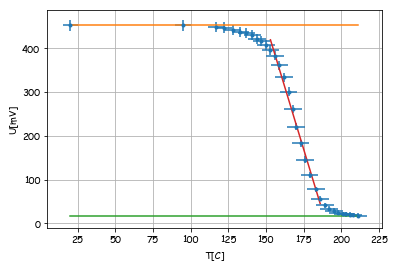

In [16]:
U_max = np.zeros((32,1)) + 452
U_min = np.zeros((32,1))+18
plt.errorbar(Dane["T[C]"],Dane["U[mV]"],delta_U,delta_T,'.')
plt.plot(Dane["T[C]"],U_max)
plt.plot(Dane["T[C]"],U_min)
parametry, kowariancja = np.polyfit(Dane["T[C]"][11:23:],Dane["U[mV]"][11:23:],1,cov=True)
# parametry_curve, kowariancja_curve = curve_fit(paramagnetyk,Dane["T[C]"][17::],Dane["U[mV]"][17::])
plt.plot(Dane["T[C]"][11:23:],Dane["T[C]"][11:23:]*parametry[0]+parametry[1])
# plt.plot(Dane["T[C]"][17::],parametry_curve[1]/(Dane["T[C]"][17::]-parametry_curve[0]))
plt.grid()
plt.ylabel("U[mV]")
plt.xlabel("T[C]")
plt.savefig("Curie_proste.png")

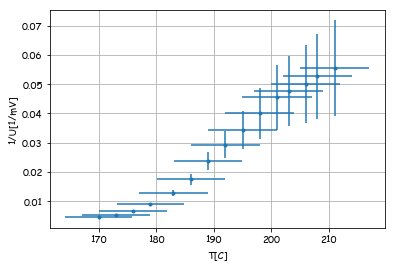

In [6]:
plt.errorbar(Dane["T[C]"][17::],1/(Dane["U[mV]"][17::]),delta_U[17::]/Dane["U[mV]"][17::]**2,delta_T[17::],'.')
plt.grid()
plt.ylabel("1/U[1/mV]")
plt.xlabel("T[C]")
plt.savefig("Curie_odwrotnosc.png")

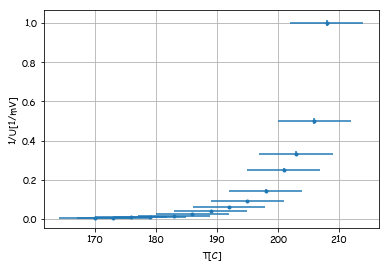

In [7]:
plt.errorbar(Dane["T[C]"][17::],1/(Dane["U[mV]"][17::]-18),delta_U[17::]/Dane["U[mV]"][17::]**2,delta_T[17::],'.')
plt.grid()
plt.ylabel("1/U[1/mV]")
plt.xlabel("T[C]")
# plt.savefig("Curie_odwrotnosc.png")